In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df_train['Gender'].isnull().sum()

13

In [10]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_test['Gender'] = df_test['Gender'].fillna(df_train['Gender'].mode()[0])

In [12]:
df_train['Gender'].isnull().sum()

0

In [13]:
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_test['Married'] = df_test['Married'].fillna(df_train['Married'].mode()[0])

In [14]:
df_train['Married'].isnull().sum()

0

In [15]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
df_train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [17]:
df_train['Dependents'] = df_train['Dependents'].fillna(0)
df_test['Dependents'] = df_test['Dependents'].fillna(0)

In [18]:
df_train['Dependents'].isnull().sum()

0

In [19]:
df_train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_test['Self_Employed'] = df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])

In [21]:
df_train['Self_Employed'].isnull().sum()

0

In [22]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [23]:
# if we see here the lean amount has different mean and median, mean is greater than median that means the data is 
# right skewed. Also mean is sensitive to outliers and the max value is way too off with 75 percentile, that means,
# 700 is very off. It better to replace the missing vlaues with median.
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())
df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_train['LoanAmount'].median())

In [24]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [25]:
# loan term is the number of days the loan is given , so categorical variable that can be measured. 
# Using mode would be the correct option here
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])

In [26]:
df_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [27]:
# credit histiry is like yes or no so we should replace it with the mode
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

In [28]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
df_train['Gender'] = df_train['Gender'].map({'Male':0, 'Female':1})

In [32]:
df_train['Married'] = (df_train['Married'] == 'Yes').astype(int)

In [33]:
df_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
df_train['Education'] = df_train['Education'].map({'Not Graduate':0,'Graduate':1})

In [35]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
df_train['Self_Employed'] = (df_train['Self_Employed'] == 'No').astype(int)

In [37]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
df_property = pd.get_dummies(df_train['Property_Area'], drop_first= True,dtype=int)

In [40]:
df_train = pd.concat([df_train,df_property],axis=1)

In [41]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1
1,LP001003,0,1,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,N,0,0
2,LP001005,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,LP001006,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,LP001008,0,0,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,1,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0
610,LP002979,0,1,3+,1,1,4106,0.0,40.0,180.0,1.0,Rural,Y,0,0
611,LP002983,0,1,1,1,1,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1
612,LP002984,0,1,2,1,1,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1


In [42]:
df_train  = df_train.drop('Property_Area', axis = 1)

In [43]:
df_train['Loan_Status'] = (df_train['Loan_Status'] == 'N').astype(int)

In [44]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,1,1,5849,0.0,128.0,360.0,1.0,0,0,1
1,LP001003,0,1,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0,0
2,LP001005,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,0,0,1
3,LP001006,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,0,0,1
4,LP001008,0,0,0,1,1,6000,0.0,141.0,360.0,1.0,0,0,1


In [45]:
df_test['Gender'] = df_test['Gender'].map({'Male':0, 'Female':1})
df_test['Married'] = (df_test['Married'] == 'Yes').astype(int)
df_test['Self_Employed'] = (df_test['Self_Employed'] == 'No').astype(int)
df_property_test = pd.get_dummies(df_test['Property_Area'], drop_first= True,dtype=int)

In [46]:
df_test = pd.concat([df_test,df_property_test],axis =1)

In [47]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Semiurban,Urban
0,LP001015,0,1,0,Graduate,1,5720,0,110.0,360.0,1.0,Urban,0,1
1,LP001022,0,1,1,Graduate,1,3076,1500,126.0,360.0,1.0,Urban,0,1
2,LP001031,0,1,2,Graduate,1,5000,1800,208.0,360.0,1.0,Urban,0,1
3,LP001035,0,1,2,Graduate,1,2340,2546,100.0,360.0,1.0,Urban,0,1
4,LP001051,0,0,0,Not Graduate,1,3276,0,78.0,360.0,1.0,Urban,0,1


In [48]:
df_test['Education'] = df_test['Education'].map({'Not Graduate':0,'Graduate':1})

In [49]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Semiurban,Urban
0,LP001015,0,1,0,1,1,5720,0,110.0,360.0,1.0,Urban,0,1
1,LP001022,0,1,1,1,1,3076,1500,126.0,360.0,1.0,Urban,0,1
2,LP001031,0,1,2,1,1,5000,1800,208.0,360.0,1.0,Urban,0,1
3,LP001035,0,1,2,1,1,2340,2546,100.0,360.0,1.0,Urban,0,1
4,LP001051,0,0,0,0,1,3276,0,78.0,360.0,1.0,Urban,0,1


In [50]:
df_test = df_test.drop('Property_Area', axis =1)

In [51]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,LP001015,0,1,0,1,1,5720,0,110.0,360.0,1.0,0,1
1,LP001022,0,1,1,1,1,3076,1500,126.0,360.0,1.0,0,1
2,LP001031,0,1,2,1,1,5000,1800,208.0,360.0,1.0,0,1
3,LP001035,0,1,2,1,1,2340,2546,100.0,360.0,1.0,0,1
4,LP001051,0,0,0,0,1,3276,0,78.0,360.0,1.0,0,1


In [52]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,0,0,0,1,1,5849,0.0,128.0,360.0,1.0,0,0,1
1,LP001003,0,1,1,1,1,4583,1508.0,128.0,360.0,1.0,1,0,0
2,LP001005,0,1,0,1,0,3000,0.0,66.0,360.0,1.0,0,0,1
3,LP001006,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0,0,0,1
4,LP001008,0,0,0,1,1,6000,0.0,141.0,360.0,1.0,0,0,1


In [53]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Loan_Status        614 non-null    int64  
 12  Semiurban          614 non-null    int64  
 13  Urban              614 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 67.3+ KB


In [55]:
# encoding dependents 
from sklearn.preprocessing import OrdinalEncoder

In [56]:
# Most of the scikit learn tranformers require 2d array and when we pass the dependents is series 
# that tranformer will get confused with stings and integers in the as the others are strings but the fill na that wwe did
# has an integer 0. so you have to convert it. and order is necessary because by default the order is alphabetical, and it can haapen that 
# the order takes other things that can afftect the order
order = [['0','1','2','3+']] # the categories also have to have a 2d array
od = OrdinalEncoder(categories = order)
df_train['Dependents'] =  od.fit_transform(df_train[['Dependents']].astype(str))

In [57]:
# Avoid using fit_tranform on test data so that you avoid data leakage
df_test['Dependents'] =  od.transform(df_test[['Dependents']].astype(str))

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Loan_Status        614 non-null    int64  
 12  Semiurban          614 non-null    int64  
 13  Urban              614 non-null    int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 67.3+ KB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    float64
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Semiurban          367 non-null    int64  
 12  Urban              367 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 37.4+ KB


In [60]:
# dropping the lan id as it hold no meaning in this classification
df_train.drop('Loan_ID', axis = 1, inplace =True)
df_test.drop('Loan_ID', axis = 1, inplace =True)

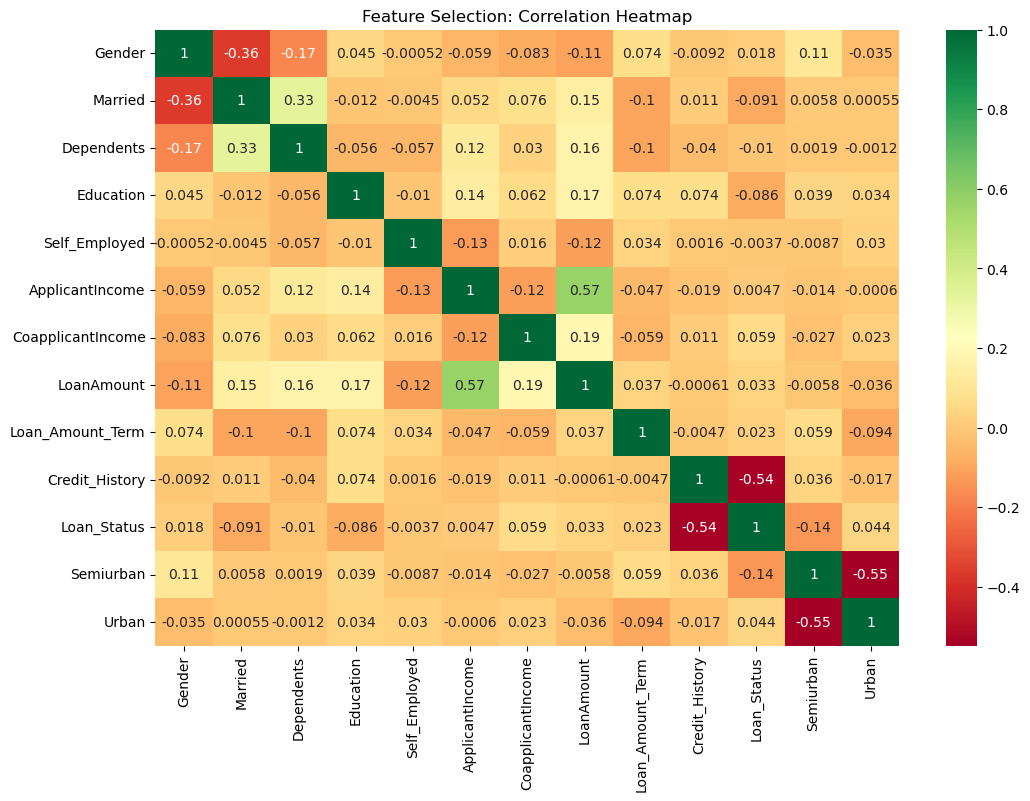

In [64]:
plt.figure(figsize = (12,8))
sns.heatmap(df_train.corr(), annot= True, cmap = 'RdYlGn')
plt.title("Feature Selection: Correlation Heatmap")
plt.show()

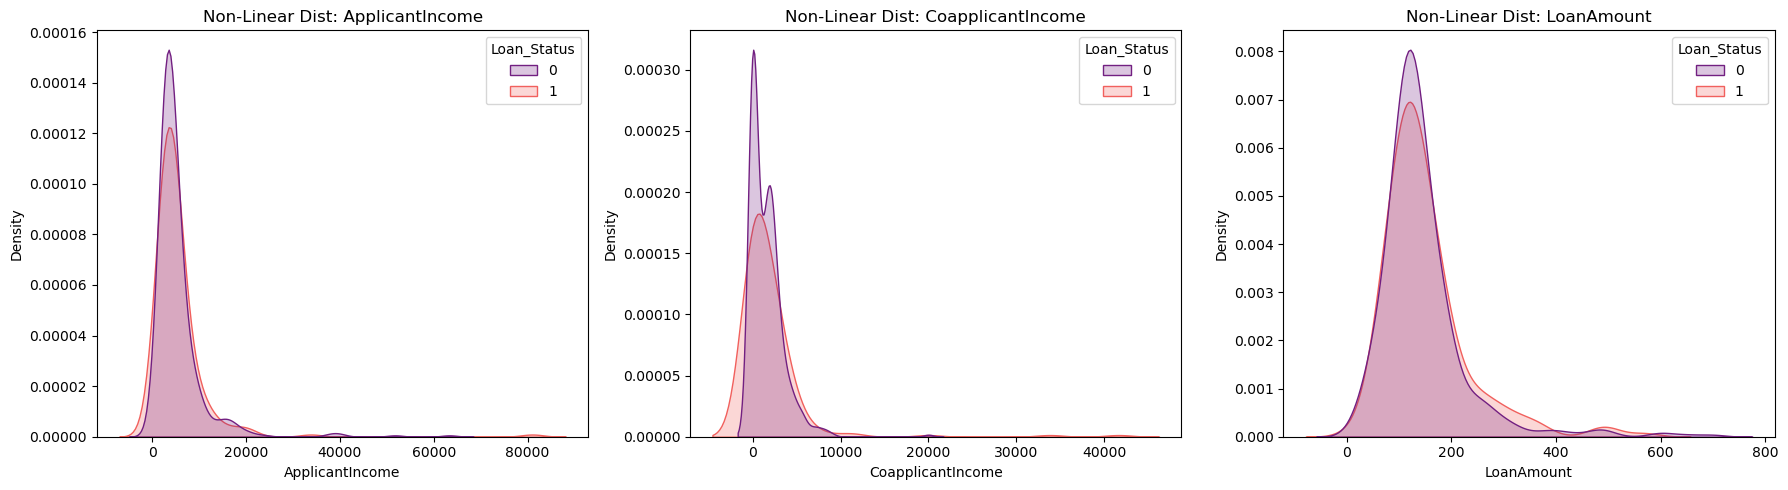

In [67]:
# we can see that 1. The strongest and weakest correlation is loan_amount & applicant income and weakest with suburban and urban,
# we can say that there is no value gretaer than 0.7 so no two features are causing insability
# 2 the precdcitive power is the greatest with credits history, some important features like Coaplicant income, aplicant income and loan amount 
# is critical but the linear relation ship is weak. So we need to do KDE.
non_linear = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize = (18,5))

for i, feature in enumerate(non_linear):
    plt.subplot (1,3,i+1)
    sns.kdeplot(data = df_train, x = feature, hue = 'Loan_Status', fill = True, common_norm =False, palette = 'magma')
    plt.title(f"Non-Linear Dist: {feature}")

plt.tight_layout()
plt.show()

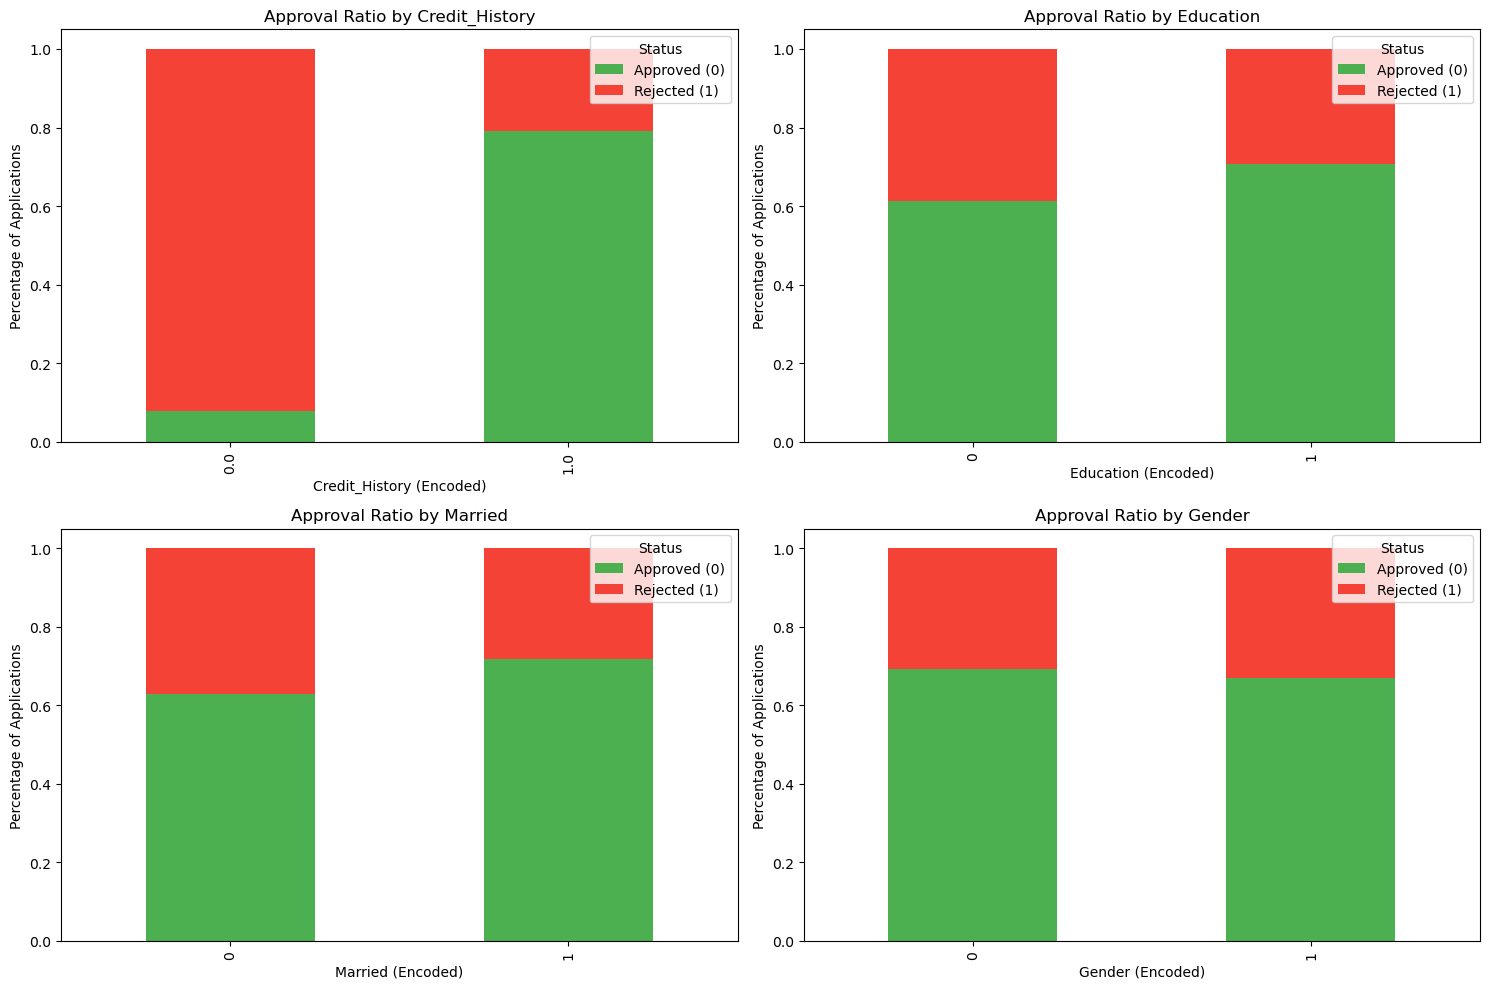

In [68]:
cat_cols = ['Credit_History', 'Education', 'Married', 'Gender']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i+1)
    
    # 1. Create a Crosstab of Feature vs Target
    # 2. Use normalize='index' to convert counts to percentages (0.0 to 1.0)
    ct = pd.crosstab(df_train[col], df_train['Loan_Status'], normalize='index')
    
    # 3. Plot as a stacked bar
    # 0 = Approved (Green), 1 = Rejected (Red) in your current encoding
    ct.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#4CAF50', '#F44336'])
    
    plt.title(f'Approval Ratio by {col}')
    plt.xlabel(f'{col} (Encoded)')
    plt.ylabel('Percentage of Applications')
    plt.legend(title='Status', labels=['Approved (0)', 'Rejected (1)'], loc='upper right')

plt.tight_layout()
plt.show()

In [69]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train = df_train.sample(frac = 1, random_satte = 43).reset_index(drop = True)

In [70]:
X = df_train.drop('Loan_Status', axis =1)
y = df_train['Loan_Status']

In [72]:
X_train, X_val,Y_train, y_val = train_test_split(X, y,  test_size= 0.2, random_state = 42, stratify = y)# startify maintians the balance in the classes

In [74]:
from sklearn.preprocessing import StandardScaler

In [78]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,1,0.0,1,1,5720,0,110.0,360.0,1.0,0,1
1,0,1,1.0,1,1,3076,1500,126.0,360.0,1.0,0,1
2,0,1,2.0,1,1,5000,1800,208.0,360.0,1.0,0,1
3,0,1,2.0,1,1,2340,2546,100.0,360.0,1.0,0,1
4,0,0,0.0,0,1,3276,0,78.0,360.0,1.0,0,1


In [81]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(df_test)

In [88]:
df_train['Loan_Status'].value_counts()

Loan_Status
0    422
1    192
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
sm =  SMOTE()

In [ ]:
# apply sampling ove the train set only
